In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from Main_Function import fun_vor_main

In [2]:
def cocircular_points(n=8, r=0.5, center=(0.5, 0.5), eps=0.0, seed=None):
    """
    Generate n points equally spaced on a circle (degenerate Voronoi).
    Optional jitter eps breaks exact degeneracy slightly.
    """
    rng = np.random.default_rng(seed)
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    pts = np.c_[center[0] + r * np.cos(angles),
                center[1] + r * np.sin(angles)]
    if eps > 0:
        pts += rng.normal(scale=eps, size=pts.shape)
    return pts

In [3]:
def lattice_points(nx=10, ny=10, eps=0.0, seed=None):
    """
    Generate a regular lattice of points (degenerate Voronoi).
    Optional jitter eps breaks exact degeneracy slightly.
    """
    rng = np.random.default_rng(seed)
    xs = np.linspace(1, 10, nx)
    ys = np.linspace(1, 10, ny)
    X, Y = np.meshgrid(xs, ys)
    pts = np.c_[X.ravel(), Y.ravel()]
    if eps > 0:
        pts += rng.normal(scale=eps, size=pts.shape)
    return pts

In [4]:
def make_voronoi(points):
    """Build a Voronoi object from given points."""
    return Voronoi(points, qhull_options="QJ")

In [5]:
def plot_voronoi(vor, points, title="Voronoi diagram"):
    """
    Plot a Voronoi diagram and its generating points.
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    # Plot Voronoi edges
    voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=True, line_colors='k')
    # Overlay the seeds
    ax.plot(points[:, 0], points[:, 1], 'ro', markersize=5, label="Seeds")
    ax.set_title(title)
    ax.set_aspect("equal")
    ax.legend()
    plt.show()


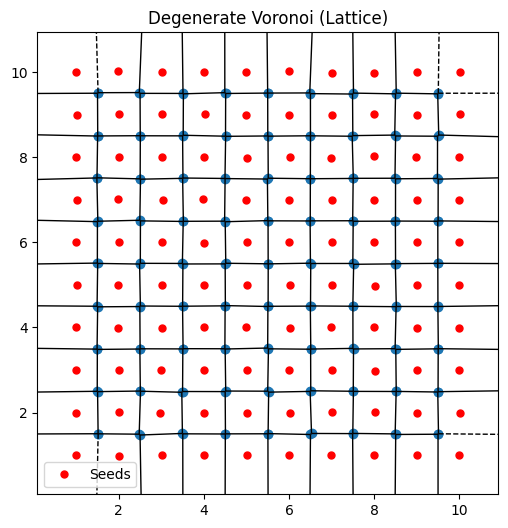

cell_centers:
 [[ 1.00336196  1.00819577]
 [ 9.00017615  0.9970294 ]
 [10.00538144  9.98928599]
 [ 9.99291196  0.99736643]
 [ 3.99458497  1.00580798]
 [ 5.00360249  1.00293343]
 [ 6.00029917  1.00545944]
 [ 5.00212889  2.0021759 ]
 [ 2.97286538  1.98105063]
 [ 3.99824839  1.99577276]
 [ 3.00898775  1.00447244]
 [ 2.00359178  0.98695498]
 [ 9.01130765 10.00166665]
 [ 5.99535876 10.01225954]
 [ 5.99311447  6.00144276]
 [ 4.01972285  9.00209881]
 [ 3.99218232 10.00086855]
 [ 4.98443453 10.00168365]
 [ 4.00035753  2.9949365 ]
 [ 4.00235621  4.00759522]
 [ 1.01522907  6.98475073]
 [ 0.98905003  8.0145823 ]
 [ 1.99374236  9.00231392]
 [ 1.00896847  8.99763173]
 [ 1.00487917 10.00161464]
 [ 1.99083346 10.02871143]
 [ 3.00876638  9.98859897]
 [ 3.00699075  9.00664031]
 [ 1.99947843  7.99946064]
 [ 1.97534435  7.00616542]
 [ 1.99930247  2.99056525]
 [ 1.00003034  1.99723981]
 [ 2.01300762  2.01007297]
 [ 2.99900918  3.00095548]
 [ 0.98769573  2.99318461]
 [ 0.99347331  6.00862009]
 [ 4.99407593

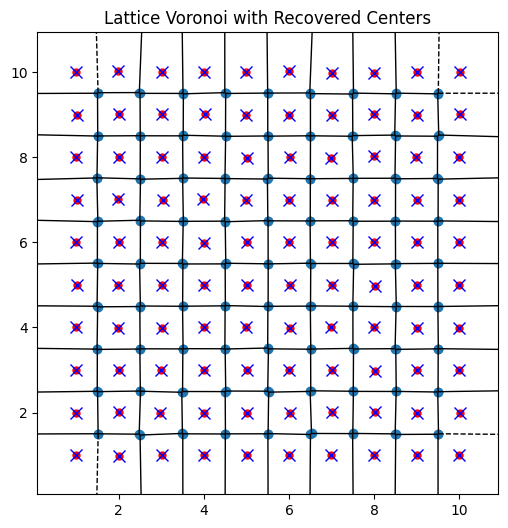

In [6]:
# pts_circ = cocircular_points(n=12, r=0.4, seed=0, eps=0.0)
# vor= make_voronoi(pts_circ)
# plot_voronoi(vor, pts_circ, title="Degenerate Voronoi (Cocircular)")

# Perfect lattice seeds
pts_lat = lattice_points(nx=10, ny=10, seed=1, eps=0.01)
vor_lat = make_voronoi(pts_lat)
plot_voronoi(vor_lat, pts_lat, title="Degenerate Voronoi (Lattice)")

from Generate_explicit_Voronoi import ExplicitVoronoi
explicit_voronoi ,vertices = ExplicitVoronoi(vor_lat)


from Main_Function import fun_vor_main
explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor_lat,pts_lat)
print('cell_centers:\n', cell_centers)

fig1, ax1 = plt.subplots(figsize=(6, 6))
voronoi_plot_2d(vor_lat, ax=ax1, show_points=False, show_vertices=True, line_colors='k')
ax1.plot(pts_lat[:, 0], pts_lat[:, 1], 'ro', markersize=5, label="Seeds")
ax1.plot(cell_centers[:, 0], cell_centers[:, 1], 'bx', markersize=8, label="Recovered Centers")
ax1.set_title("Lattice Voronoi with Recovered Centers")
ax1.set_aspect("equal")

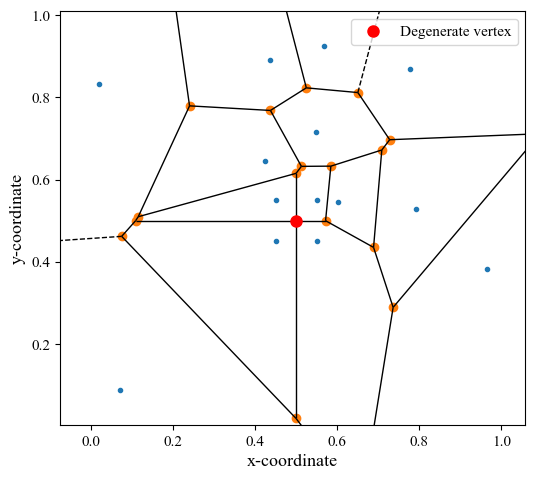

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# 1. Random background points
np.random.seed(0)
random_points = np.random.rand(10, 2)  # 20 points in [0,1]x[0,1]

# # 2. Add 4 points forming a square (centered at 0.5,0.5)
square_points = np.array([
    [0.45, 0.45],
    [0.55, 0.45],
    [0.45, 0.55],
    [0.55, 0.55]
])

# 3. Combine
# points = random_points
points = np.vstack([random_points, square_points])

# 4. Voronoi diagram
vor = Voronoi(points, qhull_options="Qbb Qc Qx")

plt.rcParams.update({
    "font.family": "Times New Roman",   # journal style font
    "font.size": 12,                    # base font size
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "lines.linewidth": 1.2              # slightly thicker lines
})

# 5. Plot
fig, ax = plt.subplots(figsize=(6,6))
voronoi_plot_2d(vor, ax=ax, show_points=True, show_vertices=True, line_colors='k')

# plot the index of vertices
# for idx, vertex in enumerate(vor.vertices):
#     ax.text(vertex[0], vertex[1], str(idx), color='blue', fontsize=8)
# Highlight the special degenerate vertex (the square’s center)
degenerate_vertex = np.array([0.5, 0.5])
ax.plot(*degenerate_vertex, 'ro', markersize=8, label="Degenerate vertex")

ax.set_aspect("equal")
ax.set_xlabel("x-coordinate")
ax.set_ylabel("y-coordinate")
ax.legend(frameon=False)  # no box around legend
# ax.grid(True, linestyle="--", alpha=0.5)
# ax.set_title("Voronoi tessellation with one degenerate vertex")
ax.legend()
plt.savefig('voronoi_with_one_degenerate_vertex.png', dpi=600, bbox_inches=None)
plt.show()



c:\Users\user\OneDrive\PHD\Repositories\Inverse_Voronoi\mirror.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  m = (y2 - y1) / (x2 - x1)
c:\Users\user\OneDrive\PHD\Repositories\Inverse_Voronoi\mirror.py:19: RuntimeWarning: invalid value encountered in scalar add
  distance = abs(m*x - y + c) / (m**2 + 1)**(0.5)


            Converged after 167 iterations
cell_centers:
 [[0.0202184  0.83261985]
 [0.56804456 0.92559664]
 [0.43758721 0.891773  ]
 [0.4236548  0.64589411]
 [0.45       0.45      ]
 [0.07103606 0.0871293 ]
 [0.45       0.55      ]
 [0.77815675 0.87001215]
 [0.96366276 0.38344152]
 [0.60276338 0.54488318]
 [0.55       0.55      ]
 [0.5488135  0.71518937]
 [0.79172504 0.52889492]
 [0.55       0.45      ]]
points:
 [[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]
 [0.45       0.45      ]
 [0.55       0.45      ]
 [0.45       0.55      ]
 [0.55       0.55      ]]


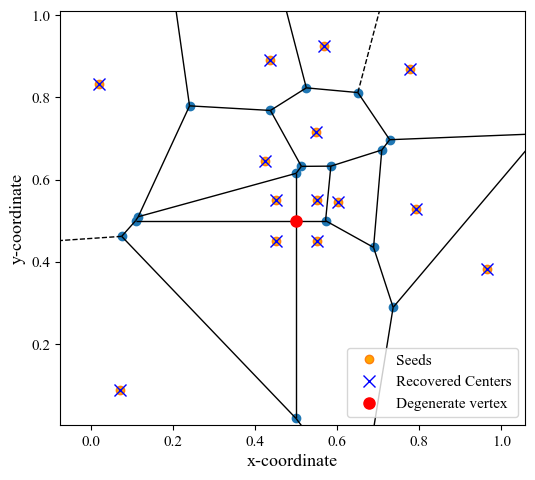

In [44]:
from Main_Function import fun_vor_main
explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor,points)

print('cell_centers:\n', cell_centers)
print('points:\n', points)

plt.rcParams.update({
    "font.family": "Times New Roman",   # journal style font
    "font.size": 12,                    # base font size
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "lines.linewidth": 1.2              # slightly thicker lines
})
fig, ax = plt.subplots(figsize=(6, 6))
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=True, line_colors='k')
ax.plot(points[:, 0], points[:, 1], 'o', markersize=6,
        markerfacecolor='orange', label="Seeds")
ax.plot(cell_centers[:, 0], cell_centers[:, 1], 'bx', markersize=8, label="Recovered Centers")

degenerate_vertex = np.array([0.5, 0.5])
ax.plot(*degenerate_vertex, 'ro', markersize=8, label="Degenerate vertex")

ax.set_aspect("equal")
ax.set_xlabel("x-coordinate")
ax.set_ylabel("y-coordinate")
ax.legend(frameon=False)  # no box around legend
# ax.grid(True, linestyle="--", alpha=0.5)
# ax.set_title("Voronoi tessellation with one degenerate vertex")
ax.legend()
plt.savefig('voronoi_with_one_degenerate_vertex.png', dpi=600, bbox_inches=None)
plt.show()


            Converged after 125 iterations


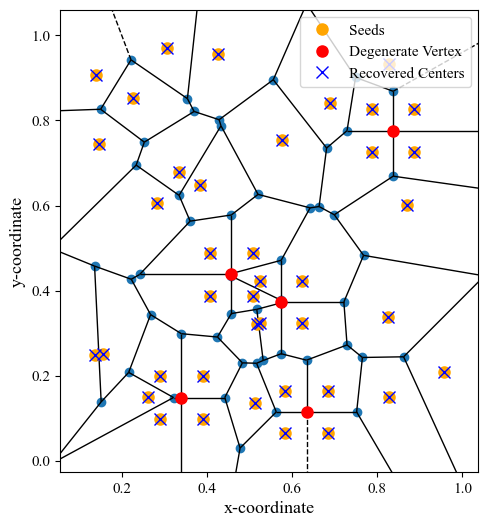

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def generate_degenerate_tessellation(num_random=20, num_degenerate=3, delta=0.05, seed=0):
    """
    Generate a Voronoi tessellation with a specified number of degenerate vertices.
    Each degenerate vertex is created by placing 4 points in a small square cluster.

    Parameters
    ----------
    num_random : int
        Number of random background points.
    num_degenerate : int
        Number of degenerate vertices to create.
    delta : float
        Half-side length of each square cluster (controls degeneracy strength).
    seed : int
        Random seed for reproducibility.

    Returns
    -------
    vor : scipy.spatial.Voronoi
        Voronoi tessellation object.
    points : ndarray, shape (N, 2)
        All generating seed points (random + degenerate).
    degenerate_vertices : ndarray, shape (num_degenerate, 2)
        Locations of the intended degenerate vertices (square centers).
    """
    rng = np.random.default_rng(seed)

    # 1. Random background points
    random_points = rng.random((num_random, 2))

    # 2. Create degenerate clusters
    degenerate_vertices = rng.random((num_degenerate, 2))  # cluster centers
    square_points_all = []

    for cx, cy in degenerate_vertices:
        square = np.array([
            [cx - delta, cy - delta],
            [cx + delta, cy - delta],
            [cx - delta, cy + delta],
            [cx + delta, cy + delta],
        ])
        square_points_all.append(square)

    square_points_all = np.vstack(square_points_all)

    # 3. Combine background + degenerate seeds
    points = np.vstack([random_points, square_points_all])

    # 4. Voronoi diagram
    vor = Voronoi(points, qhull_options="Qbb Qc Qx")

    return vor, points, degenerate_vertices

vor, points, degenerate_points = generate_degenerate_tessellation(num_random=20, num_degenerate=5, seed=10)

plt.rcParams.update({
    "font.family": "Times New Roman",   # journal style font
    "font.size": 12,                    # base font size
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "lines.linewidth": 1.2              # slightly thicker lines
})
fig3, ax3 = plt.subplots(figsize=(6, 6))
voronoi_plot_2d(vor, ax=ax3, show_points=False, show_vertices=True, line_colors='k')
ax3.plot(points[:, 0], points[:, 1], 'o', color='orange', markersize=8, label="Seeds")
ax3.plot(degenerate_points[:, 0], degenerate_points[:, 1], 'ro', markersize=8, label="Degenerate Vertex")

explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor,points)

ax3.plot(cell_centers[:, 0], cell_centers[:, 1], 'bx', markersize=8, label="Recovered Centers")


ax3.set_aspect("equal")
ax3.set_xlabel("x-coordinate")
ax3.set_ylabel("y-coordinate")
ax3.legend(frameon=False)  # no box around legend
# ax.grid(True, linestyle="--", alpha=0.5)
# ax.set_title("Voronoi tessellation with one degenerate vertex")
ax3.legend()
plt.savefig('voronoi_with_multiple_degenerate_vertex.png', dpi=600, bbox_inches=None)
plt.show()